In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('student_data.csv')
print(df.shape)
df.sample(3)

(119390, 36)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
61814,City Hotel,1,281,2016,December,53,26,1,5,2,...,Transient,79.62,0,2,Canceled,2016-09-02,Dana Levine,Dana_L@mail.com,407-970-0034,************1838
102676,City Hotel,0,5,2016,December,49,2,0,2,3,...,Transient,166.50,0,2,Check-Out,2016-12-04,Brooke Hughes,BHughes82@protonmail.com,624-650-9204,************3772
77982,City Hotel,1,45,2015,October,44,29,0,3,2,...,Transient,70.00,0,0,Canceled,2015-09-30,Gary Ayala,Gary_Ayala82@zoho.com,727-862-0777,************2101


In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


# Data Cleaning

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df.drop(columns=['name','credit_card','email','phone-number','company','agent','arrival_date_week_number','babies'], inplace= True)

In [6]:
df.shape

(119390, 28)

In [7]:
df.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
90473,City Hotel,0,220,2016,June,4,2,1,1,0.0,...,A,0,No Deposit,0,Transient-Party,0.0,0,0,Check-Out,2016-06-07


In [8]:
month={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,"July":7,"August":8,"September":9,'October':10,'November':11,'December': 12}
df['month_num']=df['arrival_date_month'].map(month)

In [9]:
pd.to_datetime(df['reservation_status_date'])

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

In [10]:
error = (df['children'] == 0) & (df['adults'] == 0)
df=df[~error]
df.shape

(119210, 29)

In [11]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
meal                                0
country                           478
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_

In [12]:
print(df['children'].mode())
df['country'].mode()[0]



0    0.0
Name: children, dtype: float64


'PRT'

### Replacing null values

In [13]:
df['country']=df['country'].fillna(df['country'].mode()[0])

In [14]:
df['children'] = df['children'].fillna(df['children'].mode()[0])

In [15]:
df.duplicated().sum()

np.int64(32033)

Removing duplicated values

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(87177, 29)

In [18]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date     

Since their is no null values,
Now making two dataframe for is_canceled for canceled booking and not_canceled booking

In [19]:
not_cancel = df[df['is_canceled'] == 0]
cancel = df[df['is_canceled']==1]
cancel.shape

(24002, 29)

In [20]:
not_cancel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63175 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           63175 non-null  object 
 1   is_canceled                     63175 non-null  int64  
 2   lead_time                       63175 non-null  int64  
 3   arrival_date_year               63175 non-null  int64  
 4   arrival_date_month              63175 non-null  object 
 5   arrival_date_day_of_month       63175 non-null  int64  
 6   stays_in_weekend_nights         63175 non-null  int64  
 7   stays_in_week_nights            63175 non-null  int64  
 8   adults                          63175 non-null  int64  
 9   children                        63175 non-null  float64
 10  meal                            63175 non-null  object 
 11  country                         63175 non-null  object 
 12  market_segment                  6317

## Data Visualization

In [21]:
df.shape

(87177, 29)

<Axes: xlabel='hotel'>

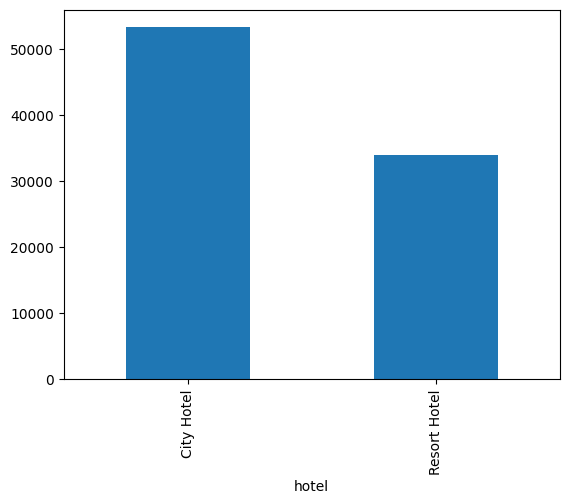

In [22]:
import seaborn as sns
df['hotel'].value_counts().plot(kind='bar')

C:\Users\ittra\AppData\Local\Temp\ipykernel_15800\1358571990.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'arrival_date_month', y = 'adr', data = df, palette = "icefire")


Text(0.5, 1.0, 'Average daily rate per month')

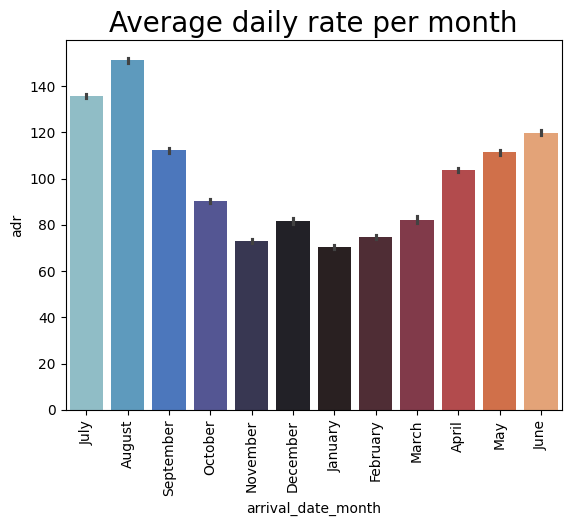

In [23]:
plt.xticks(rotation='vertical')
sns.barplot(x = 'arrival_date_month', y = 'adr', data = df, palette = "icefire")
plt.title("Average daily rate per month", fontsize = 20)

<Axes: xlabel='hotel'>

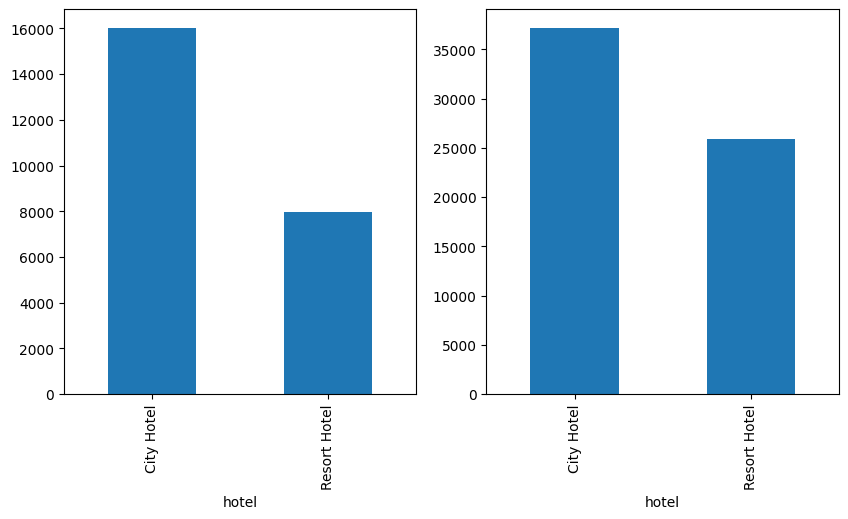

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel('Canceled')
cancel['hotel'].value_counts().plot(kind='bar')
plt.subplot(1,2,2)
plt.xlabel('Not Canceled')
not_cancel['hotel'].value_counts().plot(kind='bar')


<Axes: xlabel='lead_time', ylabel='Count'>

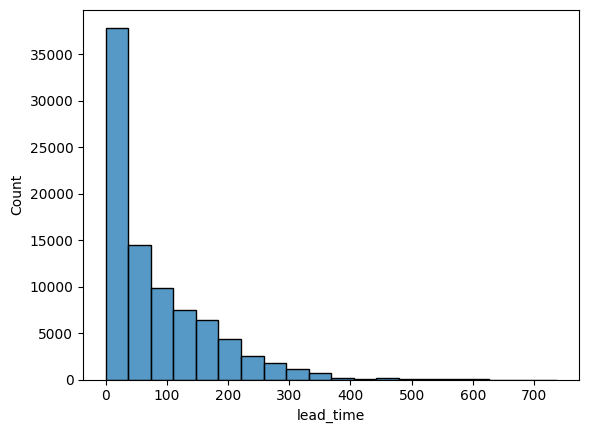

In [25]:
sns.histplot(df["lead_time"], bins = 20)

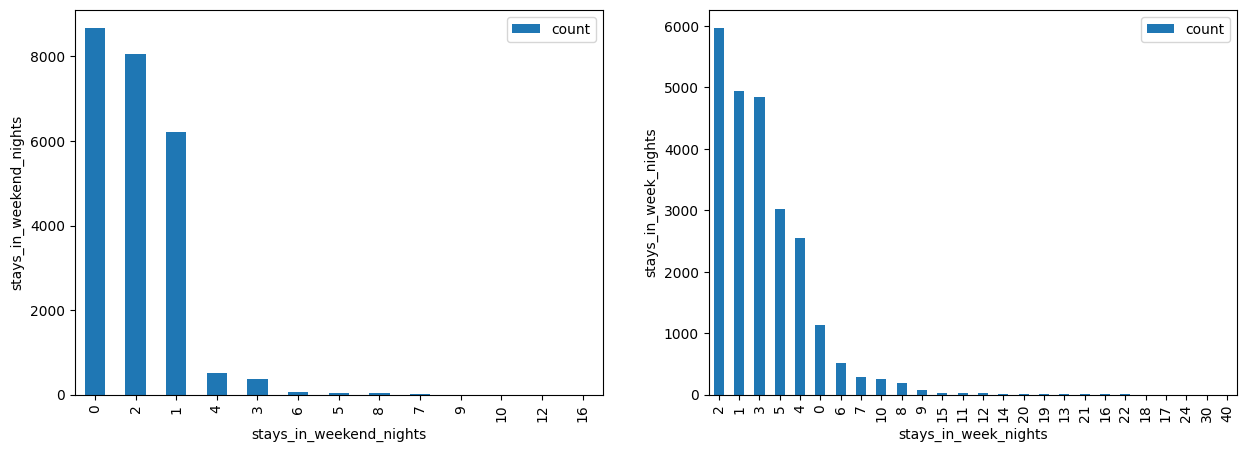

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.xlabel('Canceled')
plt.ylabel('stays_in_weekend_nights')
cancel['stays_in_weekend_nights'].value_counts().plot(kind='bar')
plt.legend()
plt.subplot(1,2,2)
plt.xlabel('Canceled')
plt.ylabel('stays_in_week_nights')
cancel['stays_in_week_nights'].value_counts().plot(kind='bar')
plt.legend()


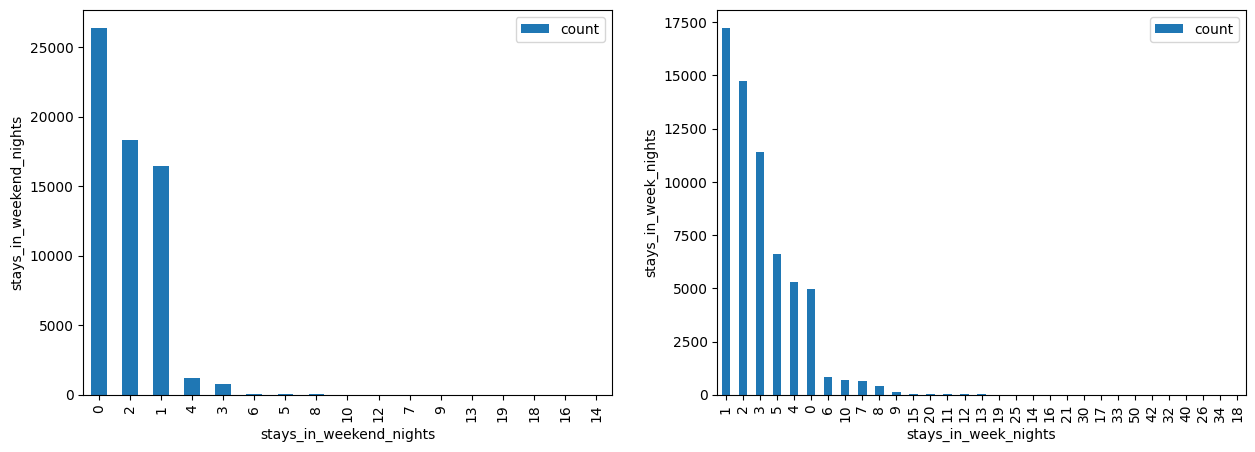

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.xlabel('not_Canceled')
plt.ylabel('stays_in_weekend_nights')
not_cancel['stays_in_weekend_nights'].value_counts().plot(kind='bar')
plt.legend()
plt.subplot(1,2,2)
plt.xlabel('not_Canceled')
plt.ylabel('stays_in_week_nights')
not_cancel['stays_in_week_nights'].value_counts().plot(kind='bar')
plt.legend()

Text(0, 0.5, 'Count')

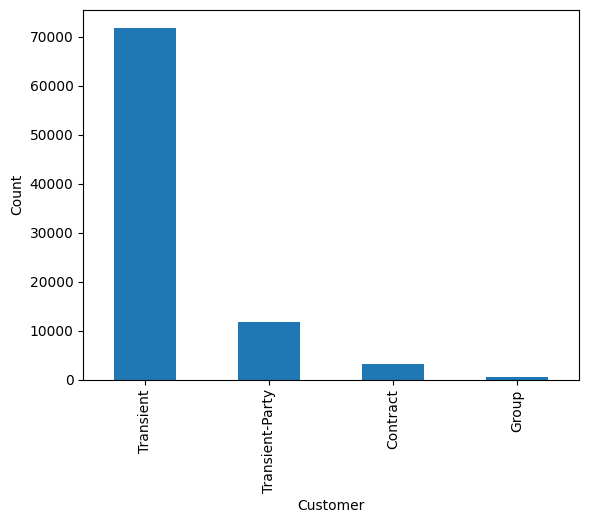

In [28]:
df['customer_type'].value_counts().plot(kind='bar')
plt.xlabel('Customer')
plt.ylabel('Count')

Value counts of all the types of customer


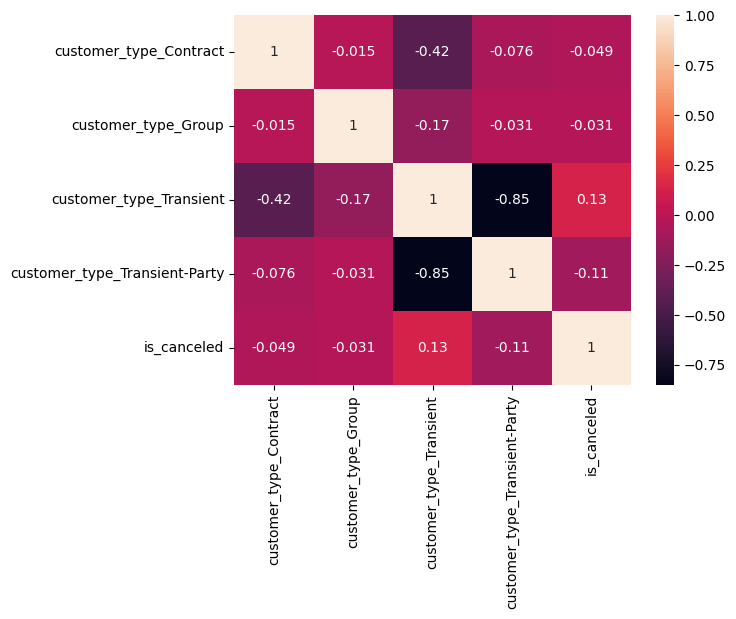

In [29]:
df=pd.get_dummies(df,columns=['customer_type'])
y=df.iloc[:,1]
X=df.iloc[:,-4:]
frame=[X,y]
cc=pd.concat(frame,axis=1)
sns.heatmap(cc.corr(),annot=True)
plt.show()

In [30]:
cc.value_counts()

customer_type_Contract  customer_type_Group  customer_type_Transient  customer_type_Transient-Party  is_canceled
False                   False                True                     False                          0              50167
                                                                                                     1              21655
                                             False                    True                           0               9897
True                    False                False                    False                          0               2623
False                   False                False                    True                           1               1783
True                    False                False                    False                          1                511
False                   True                 False                    False                          0                488
                                 

Text(0.5, 0, 'customer_types')

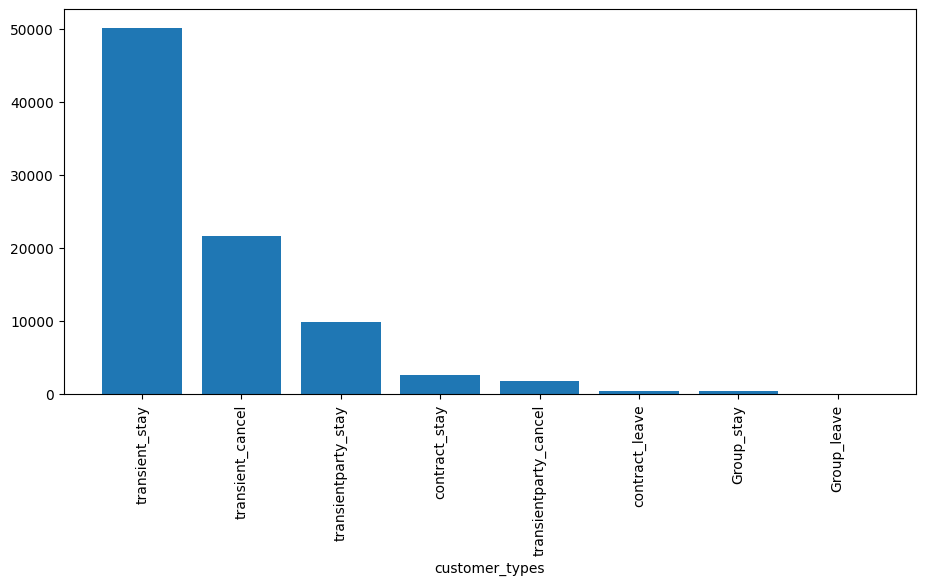

In [31]:
plt.figure(figsize=(11,5))
plt.xticks(rotation='vertical')
xlabel=['transient_stay','transient_cancel','transientparty_stay','contract_stay','transientparty_cancel','contract_leave','Group_stay','Group_leave']
plt.bar(xlabel, cc.value_counts())
plt.xlabel('customer_types')

Text(0.5, 0, 'Reserved room is not same to assigned room')

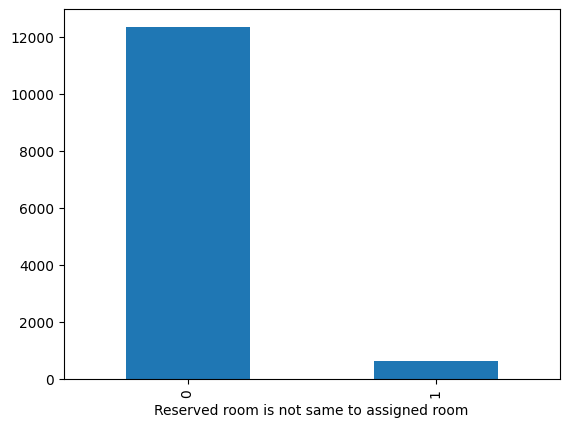

In [32]:
df[df['reserved_room_type']!= df['assigned_room_type']].is_canceled.value_counts().plot(kind='bar')
plt.xlabel('Reserved room is not same to assigned room')

from above data we can see even though reserved room is not same as assigned room ,the customer is not canceling the booking of the room.

Text(0.5, 0, 'repeated guest that canceled')

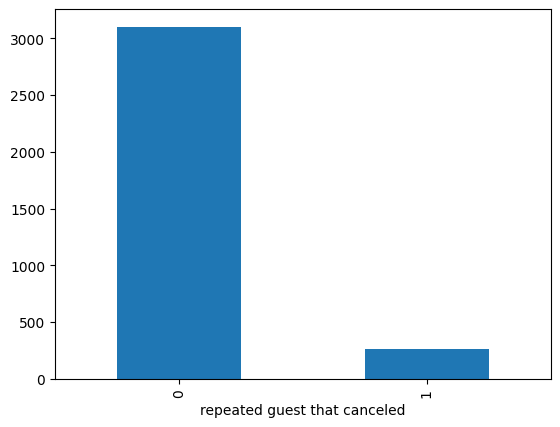

In [33]:
df[df['is_repeated_guest']==1].is_canceled.value_counts().plot(kind='bar')
plt.xlabel('repeated guest that canceled')

From the data we can see very few amount of repeated guest canceled the booking

## Canceled booking data

Text(0.5, 0, 'country_that_canceled_booking')

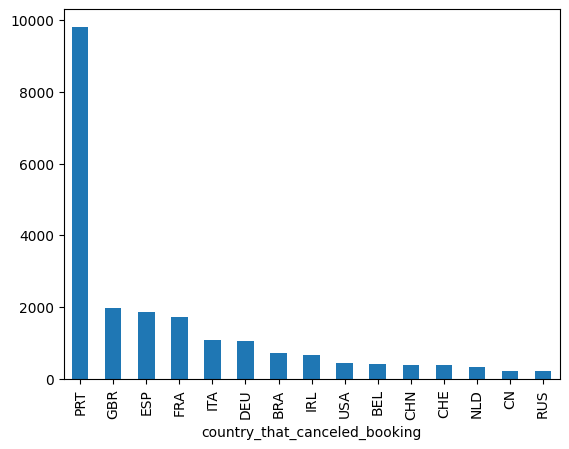

In [34]:
canceled_countries= cancel['country'].value_counts()[:15]
canceled_countries.plot(kind='bar')
plt.xlabel('country_that_canceled_booking')

Text(0.5, 0, "country_that_didn't_canceled_booking")

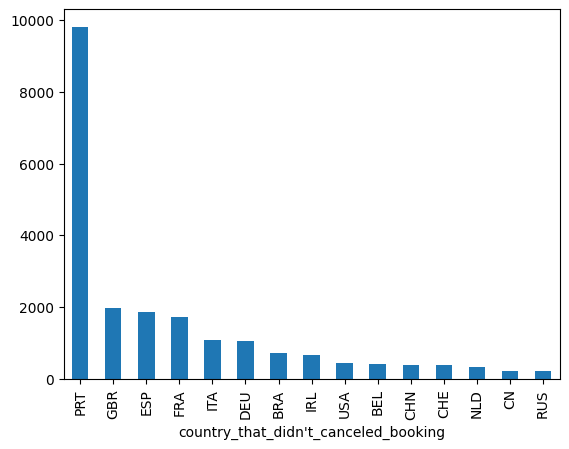

In [35]:
not_canceled_countries= not_cancel['country'].value_counts()[:15]
canceled_countries.plot(kind='bar')
plt.xlabel("country_that_didn't_canceled_booking")


In [36]:
cancel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,month_num
count,24002.0,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.000000,24002.0,24002.000000,24002.000000
mean,1.0,105.723815,2016.308391,15.892551,1.106324,2.902466,1.960337,0.188693,0.010832,0.061287,0.037330,0.161028,0.822973,117.860867,0.0,0.535914,6.494292
std,0.0,91.838482,0.662094,8.893178,1.072759,2.161134,0.841911,0.534872,0.103516,0.512453,0.809678,0.578658,10.692759,62.099450,0.0,0.758918,2.927536
min,1.0,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
25%,1.0,32.000000,2016.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.000000,0.0,0.000000,4.000000
50%,1.0,80.000000,2016.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,109.800000,0.0,0.000000,7.000000
75%,1.0,158.000000,2017.000000,24.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,144.000000,0.0,1.000000,8.000000
max,1.0,629.000000,2017.000000,31.000000,16.000000,40.000000,55.000000,10.000000,1.000000,26.000000,58.000000,16.000000,391.000000,5400.000000,0.0,5.000000,12.000000


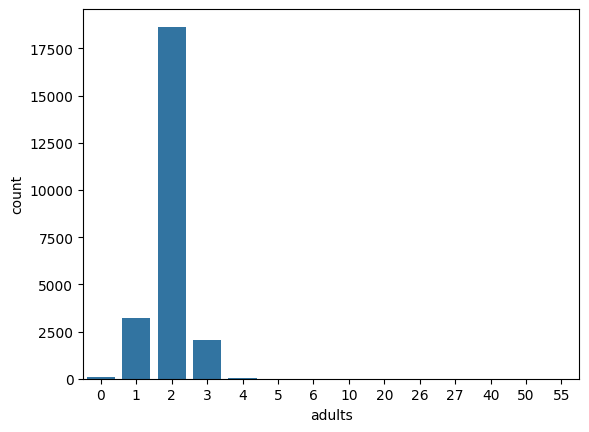

In [37]:
sns.countplot(x='adults', data=cancel)
plt.show()

Among the adults ,2 adults that booked hotel canceled the booking the most 

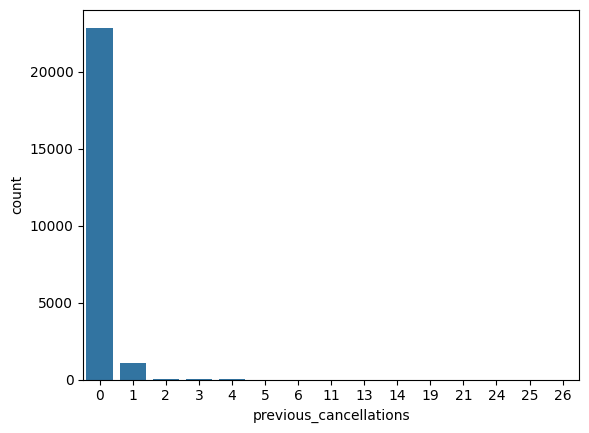

previous_cancellations
0    22859
1     1070
2       34
Name: count, dtype: int64

In [38]:
sns.countplot(x='previous_cancellations', data=cancel)
plt.show()
cancel['previous_cancellations'].value_counts()[:3]

among previous cancellation 22874 was new customer that canceled the booking,1071 previous customer canceled the booking 
and 34 customer that canceled the 2 booking and so on were present in the data


<Axes: >

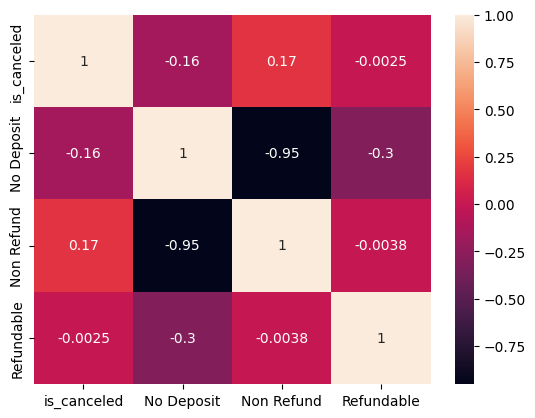

In [39]:
auto=df[['is_canceled','deposit_type']]
depo=pd.get_dummies(auto['deposit_type'],drop_first=False)
auto=pd.concat([auto,depo],axis=1)
auto.drop(['deposit_type'],axis=1,inplace=True)
auto['is_canceled']=auto['is_canceled'].astype('int')
sns.heatmap(auto.corr(),annot=True)

From above we can see the heat map betweent the is_canceled and the deposit_type, we can see non refund is directly propertional to is_canceled

# Model Evaluation

In [40]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error

In [41]:
months={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,"July":7,"August":8,"September":9,'October':10,'November':11,'December': 12}
df['month']=df['arrival_date_month'].map(months)
df['month'].astype('int')
df.drop(columns=['arrival_date_month'],inplace=True)

In [42]:
df['hotel']=df['hotel'].apply(lambda x: 1 if x == 'Resort Hotel' else 0)
df['hotel'].astype('int')

0         1
1         1
2         1
3         1
4         1
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: hotel, Length: 87177, dtype: int64

In [43]:
X = df.drop(columns=['reservation_status_date','reservation_status','deposit_type','assigned_room_type','reserved_room_type','distribution_channel',
                     'market_segment','country','meal'])
y = df['is_canceled']
X

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,...,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,month_num,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,month
0,1,0,342,2015,1,0,0,2,0.0,0,...,0,0.00,0,0,7,False,False,True,False,7
1,1,0,737,2015,1,0,0,2,0.0,0,...,0,0.00,0,0,7,False,False,True,False,7
2,1,0,7,2015,1,0,1,1,0.0,0,...,0,75.00,0,0,7,False,False,True,False,7
3,1,0,13,2015,1,0,1,1,0.0,0,...,0,75.00,0,0,7,False,False,True,False,7
4,1,0,14,2015,1,0,2,2,0.0,0,...,0,98.00,0,1,7,False,False,True,False,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,30,2,5,2,0.0,0,...,0,96.14,0,0,8,False,False,True,False,8
119386,0,0,102,2017,31,2,5,3,0.0,0,...,0,225.43,0,2,8,False,False,True,False,8
119387,0,0,34,2017,31,2,5,2,0.0,0,...,0,157.71,0,4,8,False,False,True,False,8
119388,0,0,109,2017,31,2,5,2,0.0,0,...,0,104.40,0,0,8,False,False,True,False,8


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [45]:
from sklearn.linear_model import LogisticRegression
Lor=LogisticRegression(max_iter=100)
Lor.fit(X_train,y_train)
y_pred = Lor.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))


R2 score 0.9435637578423991


c:\Users\ittra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
rfc=RandomForestClassifier(n_estimators=100,random_state=5,max_samples=0.6,max_features=0.6,max_depth=30)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
# print(accuracy_score(y_test,y_pred))
print('R2 score',r2_score(y_test,y_pred))


R2 score 1.0


In [47]:
from sklearn.linear_model import LinearRegression
Lor=LinearRegression()
Lor.fit(X_train,y_train)
y_pred = Lor.predict(X_test)
print('R2 score',r2_score(y_test,y_pred))


R2 score 1.0
